# Análisis de discriminante lineal
https://www.statology.org/linear-discriminant-analysis-in-python/



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#!pip install scikit-learn

In [3]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()
print(df['species'].unique())

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [4]:
df["resta"]=df['s_length'] - df['s_width']


In [5]:
df

,s_length,s_width,p_length,p_width,target,species,resta
0,5.1,3.5,1.4,0.2,0.0,setosa,1.6
1,4.9,3.0,1.4,0.2,0.0,setosa,1.9
2,4.7,3.2,1.3,0.2,0.0,setosa,1.5
3,4.6,3.1,1.5,0.2,0.0,setosa,1.5
4,5.0,3.6,1.4,0.2,0.0,setosa,1.4
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica,3.7
146,6.3,2.5,5.0,1.9,2.0,virginica,3.8
147,6.5,3.0,5.2,2.0,2.0,virginica,3.5
148,6.2,3.4,5.4,2.3,2.0,virginica,2.8


In [6]:
df["species"].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [7]:
#find how many total observations are in dataset
len(df.index)


150

In [8]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [9]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   


0.9800000000000001


In [10]:
#define new observation
new = [4, 1, 1.8, 1]

#predict which class the new observation belongs to
print(model.predict([new]))

#array(['setosa'], dtype='<U10')

['versicolor']


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [11]:
print(y)
df['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

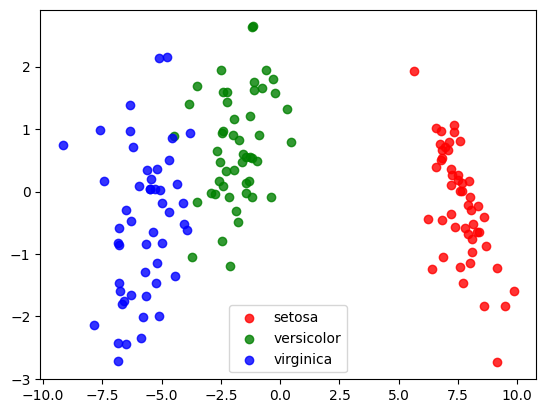

In [12]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

# Análsis Discriminante Cuadrático
https://www.statology.org/quadratic-discriminant-analysis-in-python/

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
#load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()


,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [15]:
df['species'].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [16]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#Fit the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


In [17]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9733333333333334


In [18]:
#define new observation
new = [55, 3, 10, .4]

#predict which class the new observation belongs to
model.predict([new])

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['versicolor'], dtype=object)